# Comparing skull sizes of Etruscans and Italians

## Summary

### Data

Etruscan, `float` :
breadth of etruscan skulls (mm)

Italian, `float` :
breadth of italian skulls (mm)


### Method

- Data modelled using a normal distribution
- Normality Checked using a histogram and normal probability plot
- Assumption of common population variance checked
- Mean and 95% **t**-interval returned for samples
- Two sample, two-tailed **t**-test used to test the hypothesis that
  the mean skull breadth of Etruscan skulls is equal to that of
  Italian skulls

### Summary results

```python
test_results{'tstat': 11.925, 'pval': 0.000, 'dof': 152.0}
```

### Output

<!--Add path to FinishingM248-->

### Reference

m248.b.act22

-----

## Results

### Setup the notebook

In [1]:
# import packages and modules
from scipy import stats
import statsmodels.stats.weightstats as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# set seaborn theme
sns.set_theme()

In [3]:
# change wkdir and import the data
os.chdir("..\\")
data = pd.read_csv("data\\skulls.csv")
etr = data["Etruscans"]
ita = data["Italians"].dropna()

### Preview and describe the data

In [5]:
data.head()

,Etruscans,Italians
0,141,133.0
1,148,138.0
2,132,130.0
3,138,138.0
4,154,134.0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Etruscans,84.0,143.773810,5.970512,126.0,140.0,143.5,148.00,158.0
Italians,70.0,132.442857,5.749948,116.0,129.0,132.0,136.75,148.0


### Visualise the data

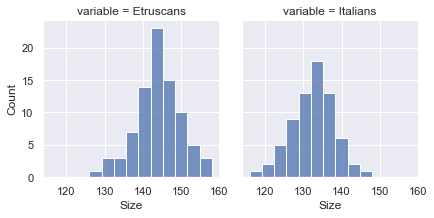

In [7]:
# frequency histograms
mdata = data.melt()
mdata.dropna(inplace=True)
g = sns.FacetGrid(mdata, col="variable")
g.map_dataframe(sns.histplot, x="value", bins=10)
g.set_axis_labels("Size", "Count")
os.chdir("figures")
plt.savefig("skulls_fig1")
os.chdir("..")
plt.show()

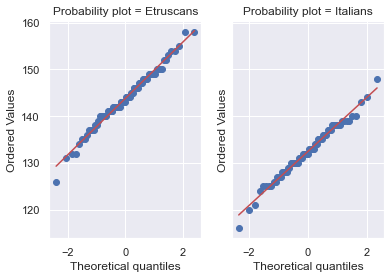

In [8]:
# probability plot for each sample
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
stats.probplot(x=etr, plot=ax1)
stats.probplot(x=ita, plot=ax2)
ax1.set(title="Probability plot = Etruscans")
ax2.set(title="Probability plot = Italians")
os.chdir("figures")
plt.savefig("skulls_fig2")
os.chdir("..")
plt.show()

### Check for common population variance

In [9]:
max(etr.var() / ita.var(), ita.var() / etr.var())

1.078190046662236

### Run the hypothesis test

In [10]:
ttest = sm.CompareMeans.from_data(data1=etr, data2=ita)

#### Get confidence intervals

In [11]:
# Etruscan
ttest.d1.tconfint_mean()

(142.4781289349803, 145.06949011263873)

In [12]:
# Italian
ttest.d2.tconfint_mean()

(131.07183038027253, 133.81388390544177)

#### Describe the difference

In [13]:
# get mean difference
etr.mean() - ita.mean()

11.330952380952368

In [14]:
# get confint of mean difference
ttest.tconfint_diff()

(9.453650451007142, 13.208254310897594)

#### Run the test

In [15]:
tstat, pval, dof = ttest.ttest_ind()

In [16]:
tstat, pval, dof

(11.924823310633796, 1.4734025976096172e-23, 152.0)